In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("test_df.xlsx", header= 2)

### Подготовка данных


In [4]:
df = df.drop(columns= 'Unnamed: 0')
df = df.drop(index=[0], axis= 0)

In [5]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors="coerce").fillna(0).astype(float)

In [6]:
df.describe()


,Звонки,SMS,Встречи,Листинги,Договора,Эксклюзивы,Авансы,Сделки,Среднее время обработки звонка (мин),Среднее время подготовки листинга (часы),Среднее время между встречей и подписанием договора (дни),Средний размер аванса (руб),Средний размер комиссии за сделку (руб),Процент завершенных сделок от общего числа договоров,Процент эксклюзивных договоров от общего числа договоров
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,121.083333,45.500000,14.583333,9.583333,7.333333,3.000000,4.416667,4.000000,5.291667,3.733333,6.416667,51666.666667,119666.666667,0.539677,0.386365
std,39.524254,16.421089,6.493587,3.705656,3.279272,1.587998,2.244155,1.841549,0.520799,0.402888,1.612901,5941.136377,11973.400471,0.068179,0.108819
min,65.000000,18.000000,4.000000,3.000000,2.000000,0.000000,1.000000,1.000000,4.500000,3.000000,4.000000,40000.000000,100000.000000,0.333333,0.000000
25%,89.500000,31.500000,8.750000,6.750000,4.750000,1.750000,2.750000,2.750000,4.875000,3.400000,5.000000,47375.000000,109500.000000,0.500000,0.393750
50%,112.500000,46.500000,15.000000,9.500000,7.500000,3.000000,4.500000,4.000000,5.250000,3.750000,6.000000,52250.000000,119500.000000,0.545455,0.400000
75%,146.250000,59.250000,20.000000,13.000000,10.000000,4.000000,6.000000,5.000000,5.725000,4.025000,8.000000,56250.000000,129250.000000,0.583333,0.446970
max,200.000000,70.000000,25.000000,15.000000,12.000000,5.000000,8.000000,7.000000,6.200000,4.500000,9.000000,60500.000000,140000.000000,0.666667,0.500000


In [14]:
df.head()

,Сотрудник,Звонки,SMS,Встречи,Листинги,Договора,Эксклюзивы,Авансы,Сделки,Среднее время обработки звонка (мин),Среднее время подготовки листинга (часы),Среднее время между встречей и подписанием договора (дни),Средний размер аванса (руб),Средний размер комиссии за сделку (руб),Процент завершенных сделок от общего числа договоров,Процент эксклюзивных договоров от общего числа договоров,Конверсия_сделок,Конверсия_эксклюзивов
1,Петрова В.С.,90.0,30.0,10.0,7.0,5.0,2.0,3.0,3.0,4.8,4.0,5.0,45000.0,110000.0,0.600000,0.400000,0.600000,0.400000
2,Сидоров Д.И.,150.0,60.0,20.0,12.0,10.0,4.0,6.0,5.0,6.0,3.0,6.0,60000.0,130000.0,0.500000,0.400000,0.500000,0.400000
3,Кузнецова Е.П.,80.0,25.0,8.0,6.0,4.0,1.0,2.0,2.0,5.5,3.8,8.0,55000.0,125000.0,0.500000,0.250000,0.500000,0.250000
4,Васильев М.К.,200.0,70.0,25.0,15.0,12.0,5.0,8.0,7.0,4.5,4.5,4.0,40000.0,100000.0,0.583333,0.416667,0.583333,0.416667
5,Николаева О.Л.,100.0,40.0,12.0,8.0,6.0,3.0,4.0,4.0,5.0,3.2,7.0,52000.0,115000.0,0.666667,0.500000,0.666667,0.500000


## Анализ данных

In [8]:
# Топ-5 сотрудников по количеству завершенных сделок
top_5_deals = df.nlargest(5, "Сделки")[["Сотрудник", "Сделки"]]
print(top_5_deals)

# # Топ-5 сотрудников по размеру комиссии
top_5_commission = df.nlargest(5, "Средний размер комиссии за сделку (руб)")[["Сотрудник", "Средний размер комиссии за сделку (руб)"]]
print(top_5_commission)

# Сотрудники с наименьшим числом встреч и договоров
low_performance = df.nsmallest(5, "Встречи")[["Сотрудник", "Встречи"]]
print(low_performance)

low_contracts = df.nsmallest(5, "Договора")[["Сотрудник", "Договора"]]
print(low_contracts)


        Сотрудник  Сделки
4   Васильев М.К.     7.0
16  Дмитриев В.Р.     7.0
8     Павлов А.Н.     6.0
13  Борисова А.К.     6.0
20   Тарасов И.Н.     6.0
         Сотрудник  Средний размер комиссии за сделку (руб)
21   Захарова Е.А.                                 140000.0
15   Федорова Н.И.                                 138000.0
6     Морозов И.В.                                 135000.0
18    Киселев А.Д.                                 134000.0
12  Григорьев П.С.                                 132000.0
         Сотрудник  Встречи
19   Антонова Л.С.      4.0
15   Федорова Н.И.      5.0
7    Семенова Т.Д.      6.0
12  Григорьев П.С.      7.0
3   Кузнецова Е.П.      8.0
         Сотрудник  Договора
15   Федорова Н.И.       2.0
19   Антонова Л.С.       2.0
7    Семенова Т.Д.       3.0
3   Кузнецова Е.П.       4.0
12  Григорьев П.С.       4.0


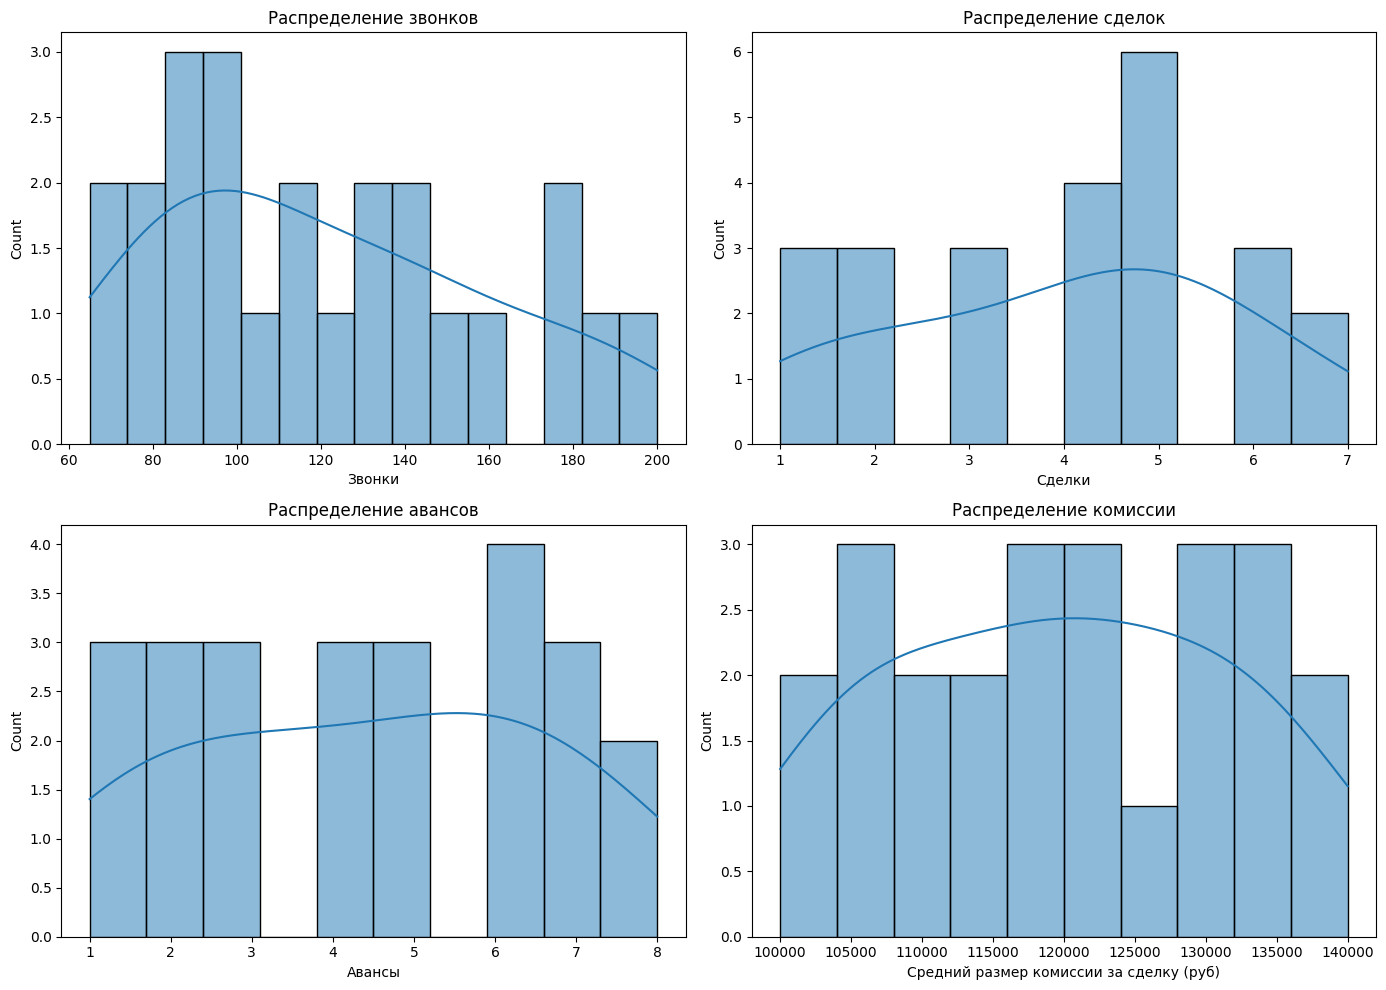

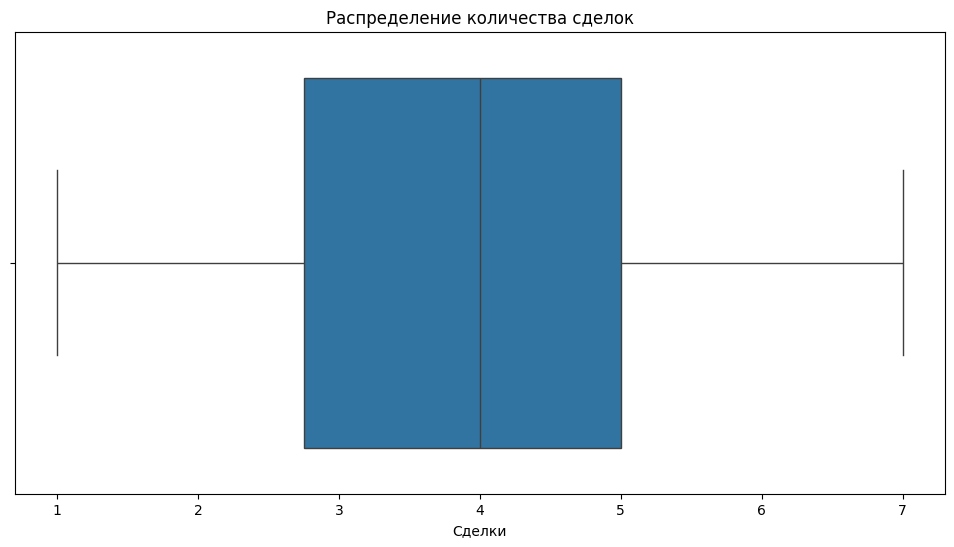

In [9]:
# Гистограммы ключевых метрик
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df["Звонки"], bins=15, kde=True, ax=axes[0, 0]).set_title("Распределение звонков")
sns.histplot(df["Сделки"], bins=10, kde=True, ax=axes[0, 1]).set_title("Распределение сделок")
sns.histplot(df["Авансы"], bins=10, kde=True, ax=axes[1, 0]).set_title("Распределение авансов")
sns.histplot(df["Средний размер комиссии за сделку (руб)"], bins=10, kde=True, ax=axes[1, 1]).set_title("Распределение комиссии")

plt.tight_layout()
plt.show()

# Boxplot (ящики с усами) для сделок
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Сделки"])
plt.title("Распределение количества сделок")
plt.show()


## Краткий вывод по описательному анализу данных
### Общие показатели:

В среднем сотрудники совершают 121 звонок, отправляют 45 SMS, проводят 14 встреч и заключают 7 договоров.  
Среднее число завершенных сделок – 4 на сотрудника, а средний процент завершенных сделок от общего числа договоров составляет 53,97%.  
Средний аванс – 51 667 руб., средняя комиссия за сделку – 119 667 руб..  

#### Разброс значений:

Количество звонков варьируется от 65 до 200, а количество встреч – от 4 до 25, что говорит о разной стратегии работы сотрудников.
Минимальное число договоров – 2, а максимальное – 12, что также указывает на значительный разброс эффективности.
Среднее время обработки звонка составляет 5,29 мин, но у некоторых сотрудников этот показатель доходит до 6,2 мин.

#### Выявление ключевых сотрудников:

#### Топ-5 по сделкам: 
Васильев М.К., Дмитриев В.Р., Павлов А.Н., Борисова А.К. и Тарасов И.Н. – по 6-7 сделок.

#### Топ-5 по комиссии: 
Захарова Е.А., Федорова Н.И., Морозов И.В., Киселев А.Д. и Григорьев П.С. (от 132 000 до 140 000 руб.).

#### Наименее активные сотрудники по встречам и договорам: 
Антонова Л.С., Федорова Н.И., Семенова Т.Д., Кузнецова Е.П., Григорьев П.С.

## Ключевые выводы:
Разброс в активности и конверсии сотрудников говорит о том, что одни лучше конвертируют встречи в сделки, а другие делают больше попыток, но с меньшей эффективностью.
Некоторым сотрудникам с низкими показателями встреч и договоров (например, Антонова Л.С. и Федорова Н.И.) стоит пройти обучение для повышения результативности.
Высокая средняя комиссия за сделку у топ-5 сотрудников может указывать на их умение работать с более прибыльными клиентами.

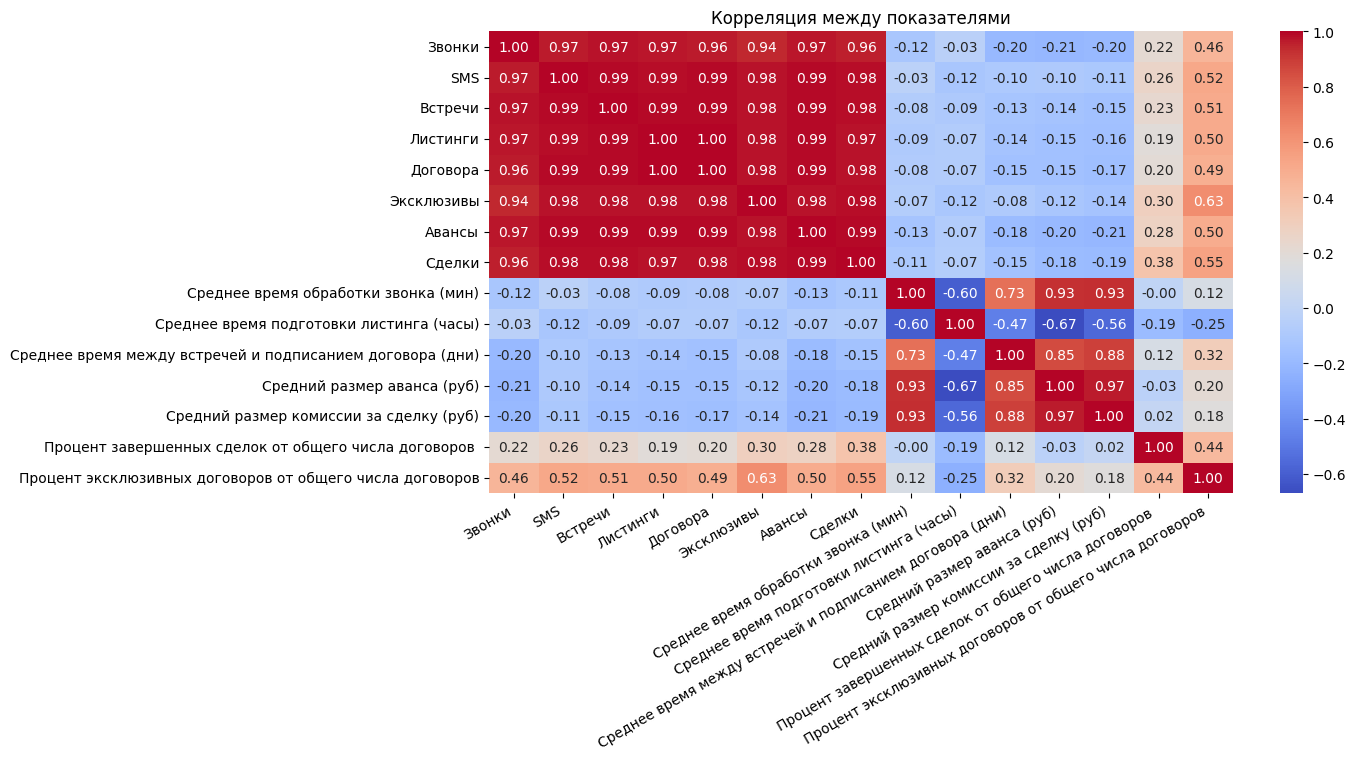

Корреляция между звонками и встречами: 0.97


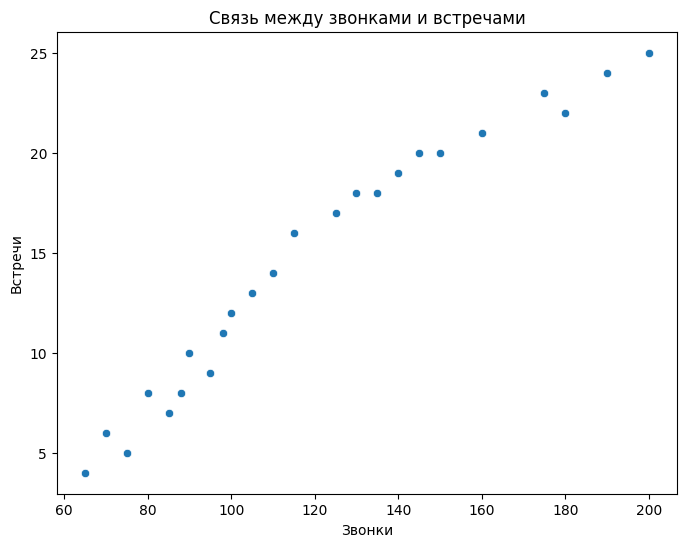

Корреляция между SMS и договорами: 0.99


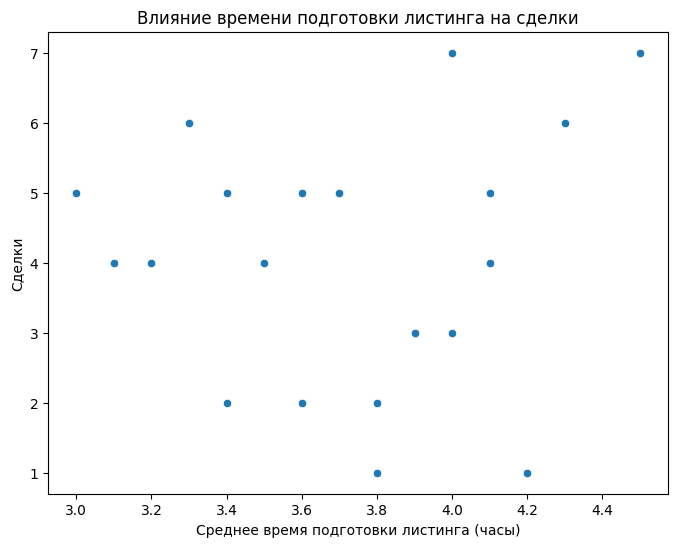

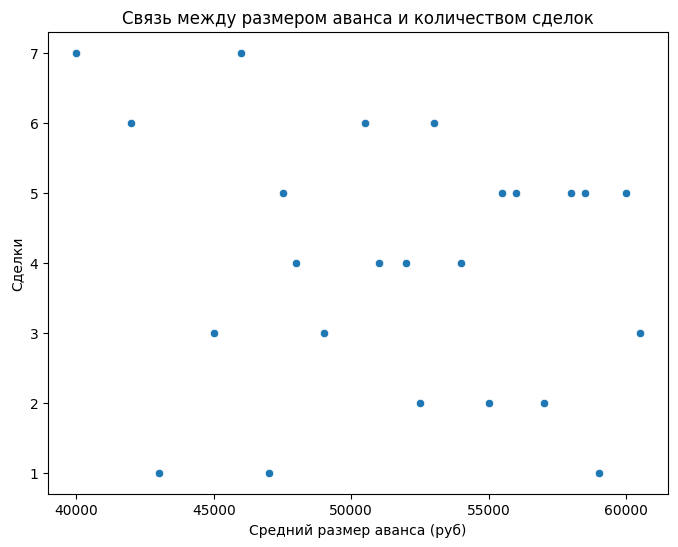

In [10]:
# Тепловая карта корреляций

df_corr = df.drop(columns=["Сотрудник"], errors="ignore")

# Строим тепловую карту
plt.figure(figsize=(12, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция между показателями")
plt.xticks(rotation=30, ha='right')
plt.show()

# Корреляция между звонками и встречами
corr_calls_meetings = df["Звонки"].corr(df["Встречи"])
print(f"Корреляция между звонками и встречами: {corr_calls_meetings:.2f}")

# Визуализация связи между звонками и встречами
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Звонки"], y=df["Встречи"])
plt.title("Связь между звонками и встречами")
plt.show()

# Корреляция между SMS и договорами
corr_sms_contracts = df["SMS"].corr(df["Договора"])
print(f"Корреляция между SMS и договорами: {corr_sms_contracts:.2f}")

# Связь между временем подготовки листинга и количеством сделок
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Среднее время подготовки листинга (часы)"], y=df["Сделки"])
plt.title("Влияние времени подготовки листинга на сделки")
plt.show()

# Влияние размера аванса на вероятность сделки
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Средний размер аванса (руб)"], y=df["Сделки"])
plt.title("Связь между размером аванса и количеством сделок")
plt.show()


## Выявление закономерностей:

### Звонки и встречи (корреляция 0.97):
Почти идеальная положительная связь. Это говорит о том, что сотрудники, которые совершают больше звонков, также организуют больше встреч. Возможно, данные показатели взаимозависимы и отражают общий уровень активности сотрудника.

### SMS и подписанные договора (корреляция 0.99):
Очень высокая положительная корреляция, практически единичная. Это может указывать на то, что SMS-коммуникация тесно связана с успешным заключением договоров. Однако стоит учитывать, что такая высокая корреляция может быть результатом мультиколлинеарности или схожести процессов в работе.

### Среднее время подготовки листинга и завершенные сделки (корреляция -0.07):
Практически отсутствует связь между этими показателями. Это значит, что время, затрачиваемое на подготовку листинга, не оказывает существенного влияния на количество завершенных сделок.

### Размер аванса и завершенные сделки (корреляция -0.18):
Слабая отрицательная связь. Это может свидетельствовать о том, что при увеличении размера аванса немного снижается вероятность завершения сделки, хотя влияние не является сильным и, возможно, не имеет практического значения.

### Вывод
В целом, активность сотрудников (звонки и SMS) сильно коррелирует с ключевыми результатами (встречи и договоры), в то время как временные затраты на подготовку листинга и размер аванса оказывают либо незначительное, либо слабое влияние на итоговую результативность сделок.



In [18]:
# 1. Добавим расчет конверсии
df["Конверсия_сделок"] = df["Сделки"] / df["Договора"]
df["Конверсия_эксклюзивов"] = df["Эксклюзивы"] / df["Договора"]

# 2. Рассчитаем средние значения по ключевым метрикам
avg_conversion = df["Конверсия_сделок"].mean()
avg_time_meeting_to_contract = df["Среднее время между встречей и подписанием договора (дни)"].mean()

# 3. Определяем лучших сотрудников (по количеству сделок и высокой конверсии)
best_employees = df[(df["Сделки"] > df["Сделки"].quantile(0.75)) & 
                    (df["Конверсия_сделок"] > avg_conversion)]

# 4. Определяем сотрудников, которым нужна поддержка (низкая конверсия при высокой активности)

# 3. Выбираем сотрудников с большим количеством договоров (например, выше 75-го перцентиля)
# и при этом конверсия сделок ниже среднего.
need_training = df[
    (df["Конверсия_сделок"] < avg_conversion) &
    (df["Договора"] > df["Договора"].quantile(0.65))
]

# 4. Выводим результат
print("Сотрудники, которым требуется поддержка (низкая конверсия сделок при высокой активности):")
print(need_training[["Сотрудник", "Сделки", "Договора", "Конверсия_сделок"]])


# 5. Анализируем временные задержки (кому сложно быстро закрывать сделки)
slow_process_employees = df[df["Среднее время между встречей и подписанием договора (дни)"] > avg_time_meeting_to_contract]

# 6. Оптимизация процессов - выявляем узкие места
long_call_processing = df[df["Среднее время обработки звонка (мин)"] > df["Среднее время обработки звонка (мин)"].mean()]
long_listing_preparation = df[df["Среднее время подготовки листинга (часы)"] > df["Среднее время подготовки листинга (часы)"].mean()]

# Выводим основные результаты
print("Лучшие сотрудники:")
print(best_employees[["Сотрудник", "Сделки", "Конверсия_сделок", "Конверсия_эксклюзивов"]])

print("\nСотрудники, которым нужна поддержка:")
print(need_training[["Сотрудник", "Сделки", "Договора", "Конверсия_сделок"]])

print("\nСотрудники с долгим процессом подписания договора:")
print(slow_process_employees[["Сотрудник", "Среднее время между встречей и подписанием договора (дни)"]])

print("\nСотрудники с долгой обработкой звонков:")
print(long_call_processing[["Сотрудник", "Среднее время обработки звонка (мин)"]])

print("\nСотрудники с долгой подготовкой листингов:")
print(long_listing_preparation[["Сотрудник", "Среднее время подготовки листинга (часы)"]])


Сотрудники, которым требуется поддержка (низкая конверсия сделок при высокой активности):
       Сотрудник  Сделки  Договора  Конверсия_сделок
2   Сидоров Д.И.     5.0      10.0               0.5
11   Орлова Е.В.     5.0      10.0               0.5
22  Романов П.В.     5.0      10.0               0.5
24    Гусев Д.М.     5.0      10.0               0.5
Лучшие сотрудники:
        Сотрудник  Сделки  Конверсия_сделок  Конверсия_эксклюзивов
4   Васильев М.К.     7.0          0.583333               0.416667
8     Павлов А.Н.     6.0          0.545455               0.454545
13  Борисова А.К.     6.0          0.545455               0.454545
16  Дмитриев В.Р.     7.0          0.583333               0.416667
20   Тарасов И.Н.     6.0          0.545455               0.454545

Сотрудники, которым нужна поддержка:
       Сотрудник  Сделки  Договора  Конверсия_сделок
2   Сидоров Д.И.     5.0      10.0               0.5
11   Орлова Е.В.     5.0      10.0               0.5
22  Романов П.В.     5.0   

C:\Users\larin\AppData\Local\Temp\ipykernel_3304\3782212969.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Сотрудник", y="Конверсия_сделок", palette="coolwarm")


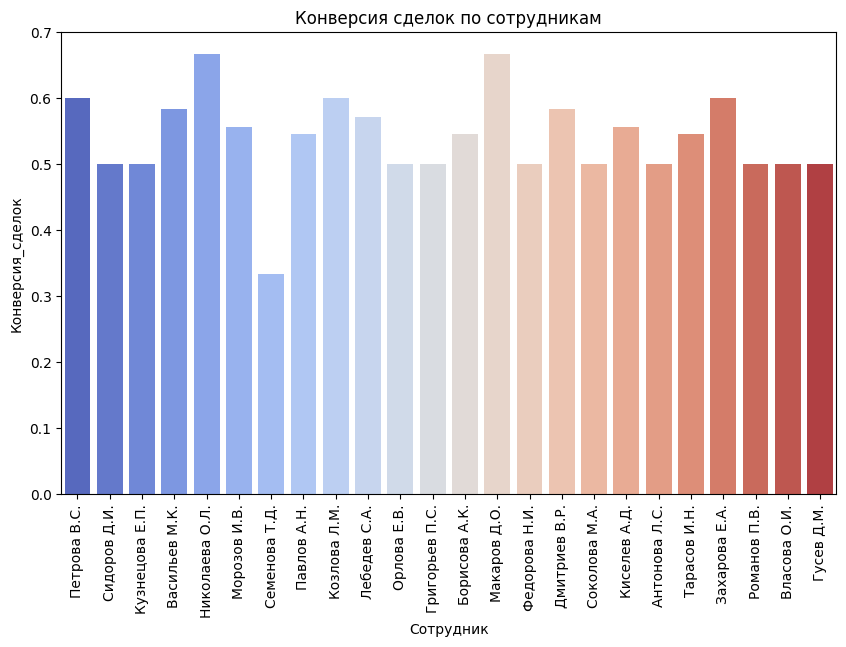

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Сотрудник", y="Конверсия_сделок", palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Конверсия сделок по сотрудникам")
plt.show()


### Формирование выводов:

1. Какие показатели наиболее сильно влияют на количество завершенных сделок?  
Конверсия сделок. Вычисление коэффициента (Сделки/Договора) показывает, насколько эффективно сотрудники превращают договоры в сделки. Сотрудники с более высоким показателем конверсии демонстрируют лучшие результаты.
Эксклюзивы. Дополнительный показатель «Конверсия_эксклюзивов» (Эксклюзивы/Договора) тоже важен, так как эксклюзивные договоры зачастую связаны с более качественным клиентским обслуживанием.
Дополнительно, ранее выявлялась значимость таких факторов, как количество эксклюзивов и авансов, однако в данном анализе основной упор сделан на итоговые показатели (сделки и конверсия).

2. Какие сотрудники демонстрируют наилучшие результаты и почему?  
Лучшие сотрудники по выбранным критериям (количество сделок и конверсия) – это Васильев М.К., Павлов А.Н., Борисова А.К., Дмитриев В.Р. и Тарасов И.Н.
Они показывают высокий уровень завершенных сделок (6–7 сделок) и конверсию сделок выше среднего (0.545–0.583), что свидетельствует о высокой эффективности в превращении договоров в сделки.
Дополнительный показатель конверсии эксклюзивных договоров (около 0.416–0.455) также подтверждает их результативность.

3. Какие сотрудники нуждаются в дополнительном обучении или поддержке?  
Сотрудники с низкой конверсией сделок при высокой активности:
Сидоров Д.И.
Орлова Е.В.
Романов П.В.
Гусев Д.М.
Все они имеют 10 договоров, но при этом всего 5 завершённых сделок, что даёт конверсию 50%. Это ниже среднего показателя по команде.

4. Какие процессы можно оптимизировать для повышения эффективности работы команды?  
Процесс подписания договоров. Из выборки сотрудников с «долгим процессом подписания договора» видно, что некоторые сотрудники (например, Кузнецова Е.П., Николаева О.Л., Морозов И.В., Козлова Л.М. и Орлова Е.В.) имеют длительный период (от 7 до 9 дней) между встречей и подписанием договора. Сокращение этого времени может ускорить цикл сделки.
Обработка звонков и подготовка листингов. Анализ по сотрудникам с «долгой обработкой звонков» и «долгой подготовкой листингов» (если такие выявятся по сравнению со средними значениями) позволит выявить узкие места в операционных процессах, что также может положительно сказаться на общем результате.
Оптимизация коммуникационных процессов. Учитывая высокую конверсию сделок у сотрудников с высокой активностью в звонках и SMS, стоит рассмотреть внедрение стандартов и тренингов для дальнейшего повышения эффективности коммуникаций


### Рекомендации 

Увеличение количества встреч и подписанных договоров:
На основе данных: Сильная корреляция между звонками и встречами, а также между SMS и договорами свидетельствует о том, что активность сотрудников напрямую влияет на результат.
Рекомендация: Усилить мотивацию сотрудников к активным коммуникациям (например, бонусы за большее число качественных встреч и договоров), а также внедрить CRM-систему для планирования и контроля встреч.

Улучшение показателей сотрудников с низкой эффективностью:
На основе данных: Анализ конверсии сделок,  а так же анализ временных показателей (длительное время между встречей и подписанием договора) у некоторых сотрудников указывает на возможные сложности в переговорах.
Рекомендация: Организовать целевые тренинги и наставничество для сотрудников, у которых наблюдается длительный цикл закрытия сделки, чтобы повысить их навыки ведения переговоров и оптимизировать рабочий процесс.

Сокращение времени между встречей и подписанием договора:
На основе данных: Выявлены сотрудники с длительным периодом от встречи до подписания договора (7–9 дней).
Рекомендация: Автоматизировать документооборот (например, внедрить электронную подпись) и оптимизировать этапы согласования договора, что позволит сократить задержки и ускорить процесс закрытия сделок.

Увеличение количества эксклюзивных договоров и авансов:
На основе данных: Лучшие сотрудники демонстрируют высокую конверсию эксклюзивных договоров, что свидетельствует о положительном влиянии эксклюзивности на результативность.
Рекомендация: Разработать дополнительные бонусные схемы для сотрудников за заключение эксклюзивных договоров и авансов, а также улучшить условия для клиентов, чтобы сделать эксклюзивное сотрудничество более привлекательным.

Эти меры напрямую перекликаются с выявленными закономерностями и результатами анализа, позволяя не только повысить общую активность, но и сократить слабые места в процессе работы команды.
